# **Importing all the required libraries**

In [29]:
# Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
import warnings
warnings.filterwarnings('ignore')

# **Importing Dataset**

In [2]:
# import dataset
data = pd.read_csv('/content/drug200.csv')
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
# Dimensions of the Dataset
data.shape

(200, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

# **Use LabelEncoder encoder to transform categorical features into numerical features**

**After using encoder**  
**Sex:**    
Female = 0, Male = 1     

**BP:**    
High = 0, Low = 1, Normal = 2

**Cholesterol:**      
High = 0, Normal = 1   

In [8]:
# Use LabelEncoder encoder to transform categorical features into numerical features
label = LabelEncoder()
data['Sex'] = label.fit_transform(data['Sex'])
data['BP'] = label.fit_transform(data['BP'])
data['Cholesterol'] = label.fit_transform(data['Cholesterol'])
data

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


# **Split the data into tarin and test**

In [9]:
# Split the data into tarin and test
x = data.drop('Drug',axis = 1)
y = data['Drug']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state= 40)

In [10]:
print(f"Shape train features :{x_train.shape}")
print(f"Shape train labels :{y_train.shape}")
print(f"Shape test features :{x_test.shape}")
print(f"Shape test labels :{y_test.shape}")

Shape train features :(160, 5)
Shape train labels :(160,)
Shape test features :(40, 5)
Shape test labels :(40,)


# **Instantiate the DecisionTreeClassifier model**

In [37]:
# Instantiate the DecisionTreeClassifier model
model = RandomForestClassifier(criterion='gini',random_state=45,n_estimators=100,max_depth=3)
model.fit(x_train,y_train)
#Predict the response for test dataset
y_pred = model.predict(x_test)

In [38]:
#Let check the accuracy
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Train accuracy
y_train_predict = model.predict(x_train)
print('Model accuracy for training data : {0:0.2f}%'.format(accuracy_score(y_train,y_train_predict)*100))

# Test accuracy
y_test_predict = model.predict(x_test)
print('Model accuracy for validation data : {0:0.2f}%'.format(accuracy_score(y_test,y_test_predict)*100))

Accuracy: 0.975
Model accuracy for training data : 90.62%
Model accuracy for validation data : 97.50%


# **Evaluating our test dataset**

In [57]:
print('Precision, Recall and f1-score : \n',classification_report(y_test,y_pred))
print('Confusion Matrix : \n',confusion_matrix(y_test,y_pred))

Precision, Recall and f1-score : 
               precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         4
       drugC       0.00      0.00      0.00         1
       drugX       0.92      1.00      0.96        12
       drugY       1.00      1.00      1.00        17

    accuracy                           0.97        40
   macro avg       0.78      0.80      0.79        40
weighted avg       0.95      0.97      0.96        40

Confusion Matrix : 
 [[ 6  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  0  1  0]
 [ 0  0  0 12  0]
 [ 0  0  0  0 17]]


# **Printing the Confusion Matrix**

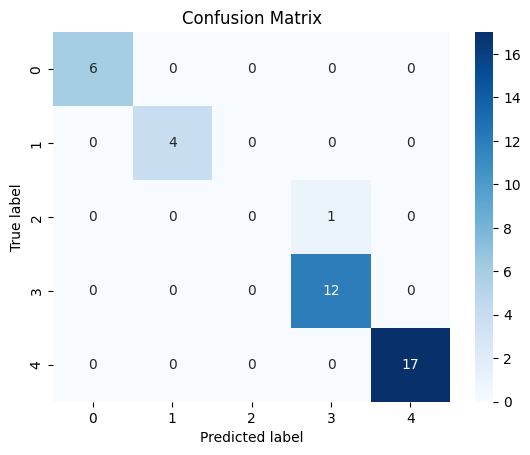

In [40]:
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

In [41]:
# Convert y_test and y_pred to binary values
lb = LabelBinarizer()
y_test_binary = lb.fit_transform(y_test)
y_pred_binary = lb.transform(y_pred)

# Calculate the ROC curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_binary[:, 1] , y_pred_binary[:, 1])


# Print the results
print("FPR :", fpr_dt)
print("TPR :", tpr_dt)
print("Threshold :", thresholds_dt)

FPR : [0. 0. 1.]
TPR : [0. 1. 1.]
Threshold : [2 1 0]


In [42]:
auc_score_dt = auc(fpr_dt,tpr_dt)
print('AUC score : ',auc_score_dt)
print('AUC score in % :{0:0.2f}%'.format(auc_score_dt*100))

AUC score :  1.0
AUC score in % :100.00%


In [43]:
def plot_roc_curve(fpr, tpr):
  plt.figure(figsize=(7.5,7.5))
  plt.plot(fpr_dt, tpr_dt, color='green', label='AUC = %0.2f' % auc_score_dt)
  plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend()
  plt.show()

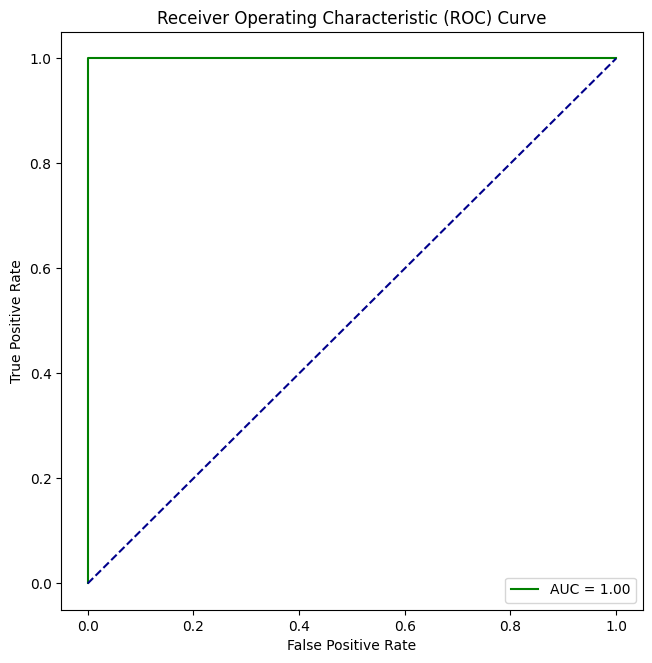

In [44]:
plot_roc_curve(fpr_dt,tpr_dt)

# **Data Visulaization**

<Axes: xlabel='Age', ylabel='Count'>

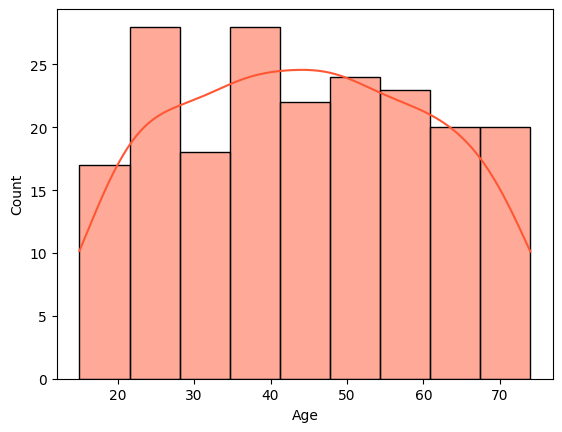

In [47]:
# Define custom colors
custom_colors = ["#FF5733", "#3366FF", "#33FF57"]  # Example colors, you can adjust as needed

# Plot the histogram with custom colors
sns.histplot(data['Age'], kde=True, color="#FF5733", palette=custom_colors)

<Axes: xlabel='Sex'>

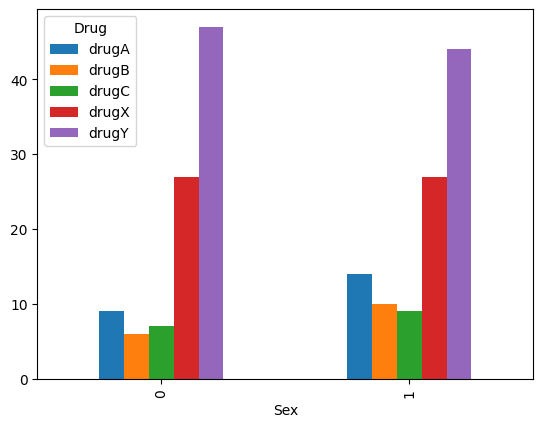

In [50]:
# Using Crosstab Bar
pd.crosstab(data.Sex,data.Drug).plot(kind="bar")

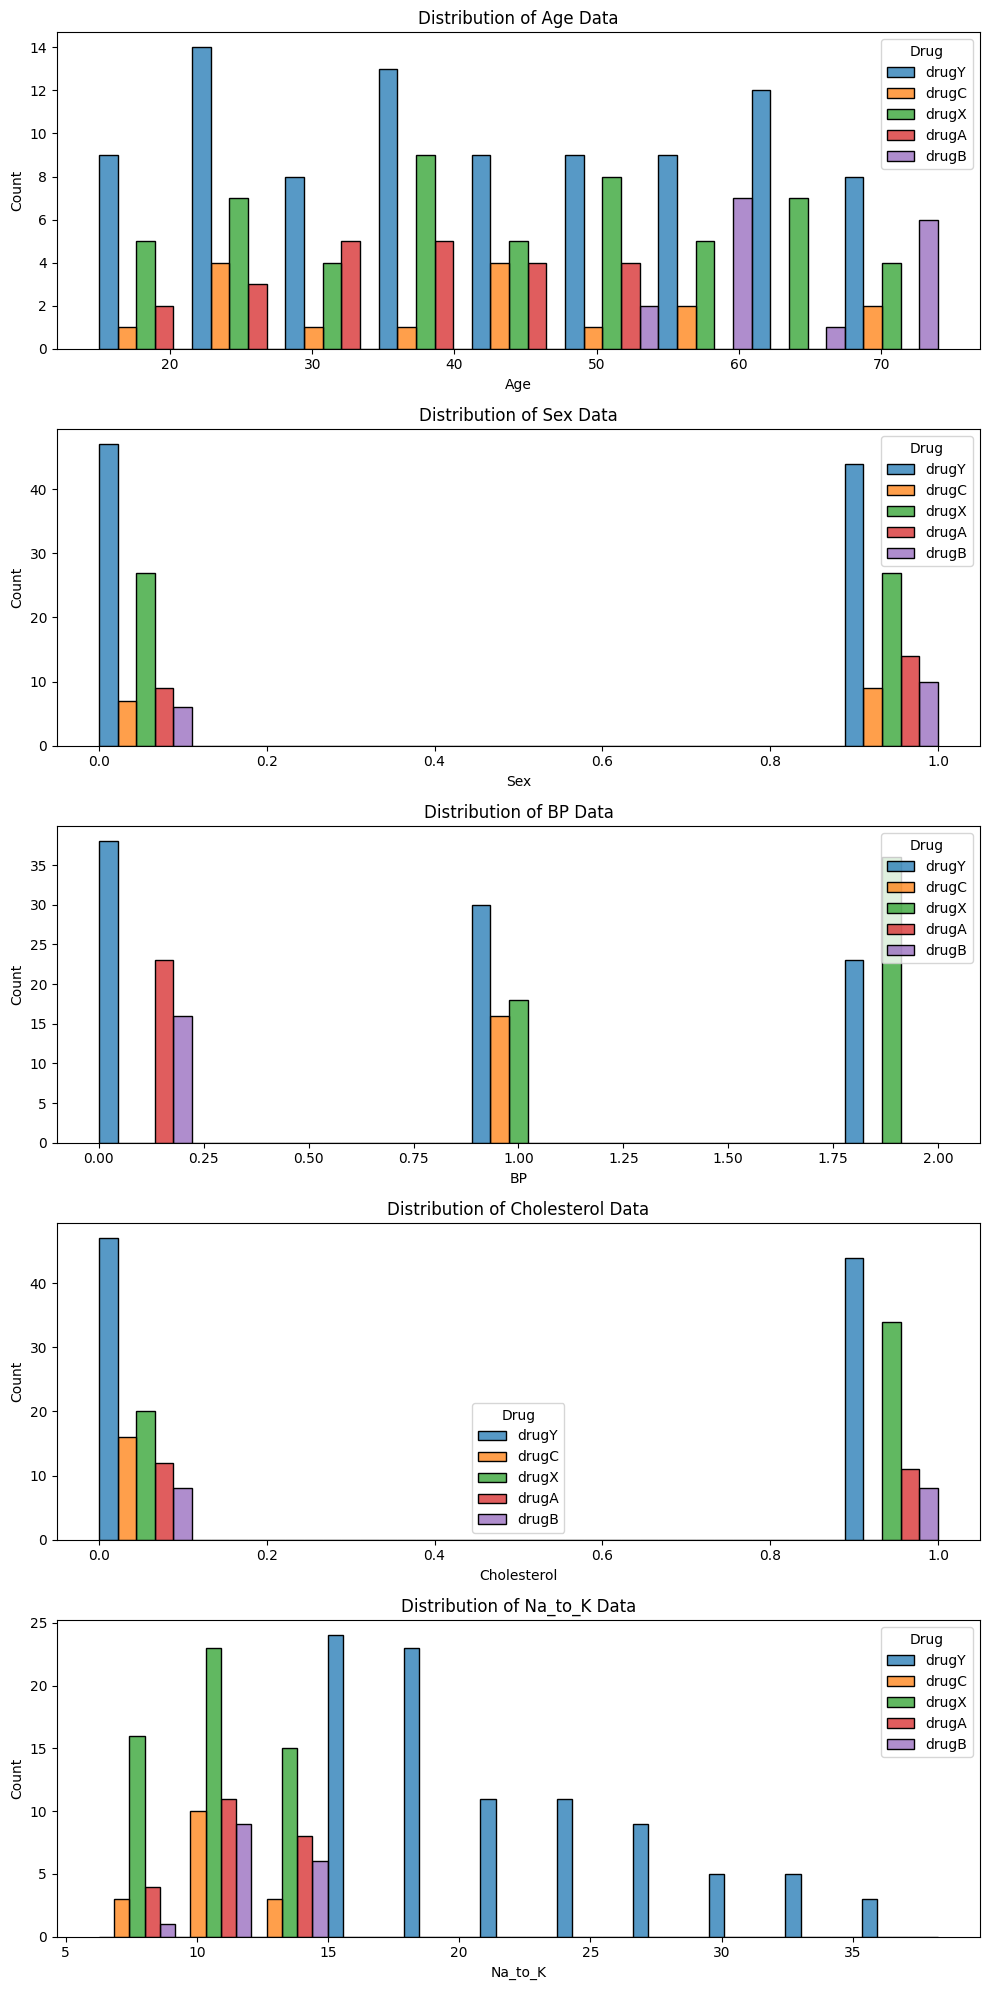

In [56]:
# Using Subplot bar
cols = data.columns[:-1].tolist()
plt.figure(figsize = (10, 20))
for i, col in enumerate(cols, 1):
    plt.subplot(5, 1, i)
    sns.histplot(x = data[col], hue = data["Drug"], multiple = "dodge")
    plt.title(f"Distribution of {col} Data")
    plt.tight_layout()
    plt.plot()